In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm


movie_df = pd.read_csv('output/Final_Data.csv')
movie_df.head()

,Title,Budget,Domestic_Gross,Year,Crit_Rating,Aud_Rating,Runtime_Min,Genre,MPAA_Rating
0,VARSITY BLUES,16000000,52894169,1999,41,76.0,104.0,Drama,R
1,AT FIRST SIGHT,40000000,22365133,1999,32,46.0,128.0,"Drama, Romance",PG-13
2,VIRUS,75000000,14010690,1999,10,21.0,100.0,"Action & Adventure, Horror, Science Fiction & ...",R
3,IN DREAMS,30000000,12017369,1999,24,40.0,120.0,"Horror, Mystery & Suspense",R
4,SHES ALL THAT,10000000,63465522,1999,40,55.0,95.0,"Comedy, Drama, Romance",PG-13


In [4]:
movie_df['ROI'] = (movie_df['Domestic_Gross']/ movie_df['Budget']) *100

movie_df['Runtime_Min'].replace('', np.nan, inplace=True)
movie_df.dropna(subset=['Runtime_Min'],inplace=True)

movie_df['Aud_Rating'].replace('', np.nan, inplace=True)
movie_df.dropna(subset=['Aud_Rating'],inplace=True)

movie_df.head()

,Title,Budget,Domestic_Gross,Year,Crit_Rating,Aud_Rating,Runtime_Min,Genre,MPAA_Rating,ROI
0,VARSITY BLUES,16000000,52894169,1999,41,76.0,104.0,Drama,R,330.588556
1,AT FIRST SIGHT,40000000,22365133,1999,32,46.0,128.0,"Drama, Romance",PG-13,55.912833
2,VIRUS,75000000,14010690,1999,10,21.0,100.0,"Action & Adventure, Horror, Science Fiction & ...",R,18.680920
3,IN DREAMS,30000000,12017369,1999,24,40.0,120.0,"Horror, Mystery & Suspense",R,40.057897
4,SHES ALL THAT,10000000,63465522,1999,40,55.0,95.0,"Comedy, Drama, Romance",PG-13,634.655220


In [5]:
movie_df.count()

Title             2335
Budget            2335
Domestic_Gross    2335
Year              2335
Crit_Rating       2335
Aud_Rating        2335
Runtime_Min       2335
Genre             2335
MPAA_Rating       2335
ROI               2335
dtype: int64

In [6]:
gb = movie_df.groupby(['Year',"MPAA_Rating"]).size()
count = pd.DataFrame(gb).reset_index()
count.rename(columns = {0:'Count'}, inplace = True)
count

# movie_df['Year'].value_counts()

,Year,MPAA_Rating,Count
0,1999,G,5
1,1999,PG,9
2,1999,PG-13,32
3,1999,R,59
4,2000,G,6
...,...,...,...
74,2017,R,31
75,2018,NR,1
76,2018,PG,14
77,2018,PG-13,43


    Year MPAA_Rating  Count
21  2004          NR      1
75  2018          NR      1


<Figure size 1440x576 with 0 Axes>

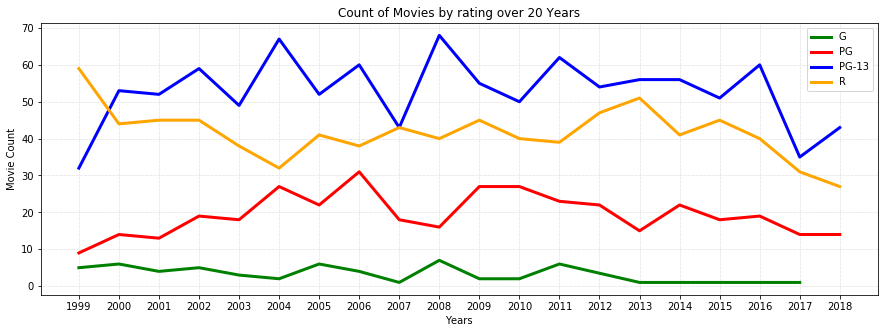

In [9]:
G = count[count['MPAA_Rating'] == 'G']
PG = count[count['MPAA_Rating'] == 'PG']
PG_13 = count[count['MPAA_Rating'] == 'PG-13']
R = count[count['MPAA_Rating'] == 'R']
NR = count[count['MPAA_Rating'] == 'NR']
print(NR)
plt.figure(figsize=(20,8))
x_axis = [1999, 2000, 2001, 2002, 2003, 2004, 2005, 
     2006, 2007, 2008, 2009, 2010, 2011, 2012, 
     2013, 2014, 2015, 2016, 2017, 2018]

# colors = cm.rainbow(np.linspace(0, 1, 20))
fig, ax = plt.subplots()

# Set the plot title and axes titles
plt.title("Count of Movies by rating over 20 Years")
plt.xlabel("Years")
plt.ylabel("Movie Count")

fig.set_size_inches(15, 5)
tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations, minor=False)

ax.plot(G['Year'], G['Count'], color='green', label="G", linewidth=3)
ax.plot(PG['Year'], PG['Count'], color='red', label="PG", linewidth=3)
ax.plot(PG_13['Year'], PG_13['Count'], color='blue', label="PG-13", linewidth=3)
ax.plot(R['Year'], R['Count'], color='orange', label="R", linewidth=3)
# ax.plot(NR['Year'], NR['Count'], color='purple', label="NR", linewidth=3, linestyle='dashed')
ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)
ax.legend(loc=1)

plt.savefig('output/movies_by_rating.png')

In [10]:
movie_gb = movie_df.groupby(["Year", "MPAA_Rating"])['ROI'].mean()
print(movie_gb)

avg_roi_df = pd.DataFrame(movie_gb).reset_index()
avg_roi_df


Year  MPAA_Rating
1999  G              183.192692
      PG             159.262103
      PG-13          178.358823
      R              567.709519
2000  G              166.682893
                        ...    
2017  R              362.213729
2018  NR              98.027910
      PG             275.957435
      PG-13          239.484963
      R              281.560702
Name: ROI, Length: 79, dtype: float64


,Year,MPAA_Rating,ROI
0,1999,G,183.192692
1,1999,PG,159.262103
2,1999,PG-13,178.358823
3,1999,R,567.709519
4,2000,G,166.682893
...,...,...,...
74,2017,R,362.213729
75,2018,NR,98.027910
76,2018,PG,275.957435
77,2018,PG-13,239.484963


<Figure size 1440x576 with 0 Axes>

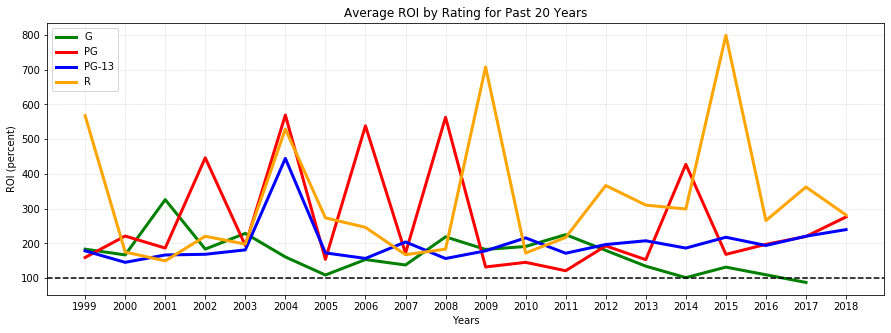

In [11]:
G = avg_roi_df[avg_roi_df['MPAA_Rating'] == 'G']
PG = avg_roi_df[avg_roi_df['MPAA_Rating'] == 'PG']
PG_13 = avg_roi_df[avg_roi_df['MPAA_Rating'] == 'PG-13']
R = avg_roi_df[avg_roi_df['MPAA_Rating'] == 'R']
# NR = avg_roi_df[avg_roi_df['MPAA_Rating'] == 'NR']

# plt.figure(figsize=(20,8))
x_axis = [1999, 2000, 2001, 2002, 2003, 2004, 2005, 
     2006, 2007, 2008, 2009, 2010, 2011, 2012, 
     2013, 2014, 2015, 2016, 2017, 2018]
# plt.xticks(1999, 2018)

# plt.plot(G['Year'], G['ROI'], color='green')
# plt.plot(PG['Year'], PG['ROI'], color='red')
# plt.plot(PG_13['Year'], PG_13['ROI'], color='blue')
# plt.plot(R['Year'], R['ROI'], color='orange')
# plt.plot(NR['Year'], NR['ROI'], color='black')

# colors = cm.rainbow(np.linspace(0, 1, 20))
fig, ax = plt.subplots()

# Set the plot title and axes titles
plt.title("Average ROI by Rating for Past 20 Years")
plt.xlabel("Years")
plt.ylabel("ROI (percent)")

fig.set_size_inches(15, 5)
tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations, minor=False)

ax.plot(G['Year'], G['ROI'], color='green', label="G", linewidth=3)
ax.plot(PG['Year'], PG['ROI'], color='red', label="PG", linewidth=3)
ax.plot(PG_13['Year'], PG_13['ROI'], color='blue', label="PG-13", linewidth=3)
ax.plot(R['Year'], R['ROI'], color='orange', label="R", linewidth=3)
# ax.plot(NR['Year'], NR['ROI'], color='purple', label="NR", linewidth=3, linestyle='dashed')
ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)
ax.legend(loc=2)
plt.axhline(y=100, color='black', linestyle='--')

plt.savefig('output/ROI_by_rating.png')